<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/ASSIGNMENT_1/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf

 

In [ ]:
# number of data initial N=4000
N=4000
# size of each sample
L=2 
# box size
B=100

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


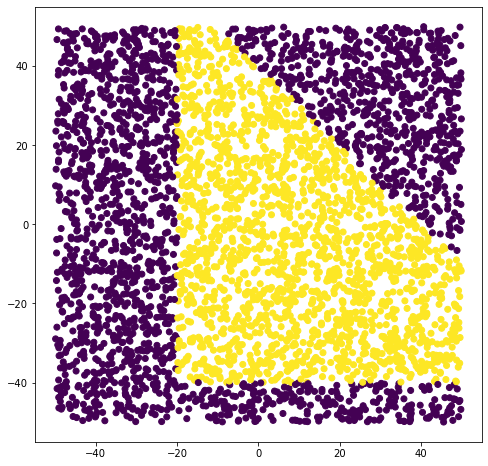

In [ ]:
import numpy as np
TYPE = 1
x = np.loadtxt('initial_data-for-DNN-1.dat')
y = np.loadtxt('initial_labels-for-DNN-1.dat')

#try with initial_data, reducedx4_data, reducedx10_data, increasedx2_data, increasedx4_data and same with labels
#see the code in later cells

#train data
perc_train = 0.8
# dim of samaple
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 3200 	 Validation: 800


In [ ]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)


In [ ]:
#augmenting data 
#N_train = number of train samples
# for each (x1, x2) 5 random pairs (s1, s2) are generated so we obtain 5 pairs (x1+s1, x2+s2)
shift = np.random.normal(loc = 0, scale = 1, size = (N_train*5, 2))
x_train_shift = np.zeros(shape = (N_train*5, 2 )) #initialise with zero values
y_train_shift = np.zeros(shape = (N_train*5, 1 ))

for i in range (N_train):
    x_train_shift[i*5] = x_train[i] + shift[i*5]
    y_train_shift[i*5] = y_train[i]
    for j in range (4):
        x_train_shift[(i*5)+j+1] = x_train[i] + shift[(i*5)+j+1]
        y_train_shift[(i*5)+j+1] = y_train[i]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
np.random.seed(12345)
def create_DNN(case = 1):
    if case == 1:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        nepoch = 400
    if case == 2:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        nepoch = 400
    return model

def compile_model(case=1, optimizer=tf.keras.optimizers.Adam()):
    # create the mode
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [ ]:
model = compile_model()

In [ ]:
history = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid))

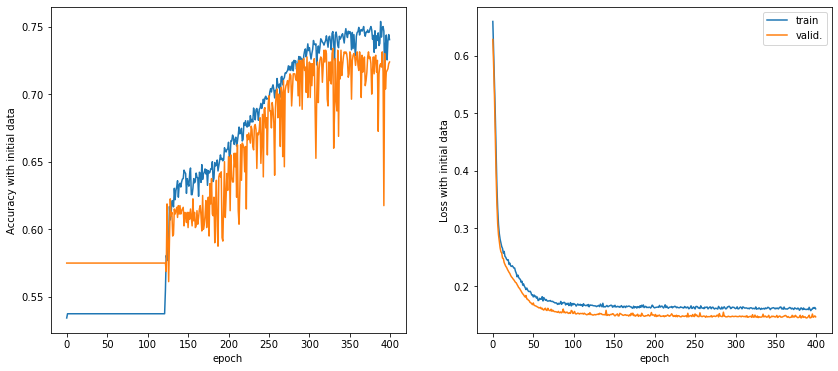

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train")
ax.plot(history.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy with initial data")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss with initial data")
ax.legend()

2
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[3.18350011e+01 2.22752834e-02] 1.0
[26.88139184 42.81705491] 0.0
[ -1.03732963 -12.26550462] 1.0
[-11.61512788 -18.45040966] 1.0
[47.32299816 13.40543771] 0.0
[-24.75074054  22.08620582] 0.0
[26.87354472 28.18371034] 0.0
[-16.39448381  32.63804268] 1.0
data: 1000
train: 800


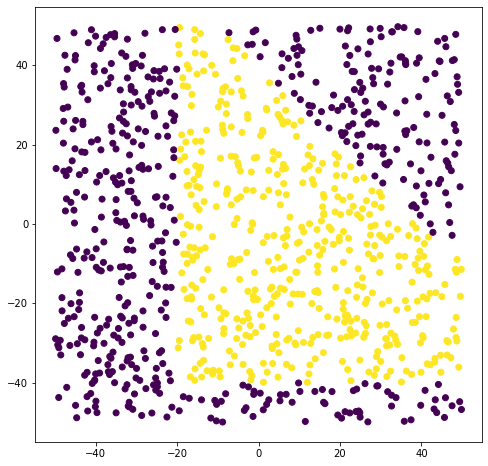

In [ ]:
# reduced data x4 

x_rx4 = np.loadtxt('reducedx4_data-for-DNN-1.dat')
y_rx4 = np.loadtxt('reducedx4_labels-for-DNN-1.dat')

#train data
perc_train = 0.8
# dim of samaple
L_rx4 = len(x_rx4[0])
print(L_rx4)
N_rx4 = len(x_rx4)
for i in range(10):
    print(x_rx4[i], y_rx4[i])

N_train_rx4 = int(perc_train * N_rx4)
print(f'data: {N_rx4}\ntrain: {N_train_rx4}')

plt.figure(figsize = (8,8))
plt.scatter(x_rx4[:,0],x_rx4[:,1],c=y_rx4)
plt.show()

In [ ]:
(x_train_rx4, y_train_rx4) = (x_rx4[0:N_train_rx4], y_rx4[0:N_train_rx4])
(x_valid_rx4, y_valid_rx4) = (x_rx4[N_train_rx4:], y_rx4[N_train_rx4:])
print("Train:", len(x_train_rx4), "\t Validation:", len(x_valid_rx4))

Train: 800 	 Validation: 200


In [ ]:
x_train_rx4 = Rescale(x_train_rx4)
x_valid_rx4 = Rescale(x_valid_rx4)

In [ ]:
history_rx4 = model.fit(x_train_rx4, y_train_rx4, epochs=400, batch_size=50, validation_data=(x_valid_rx4, y_valid_rx4))

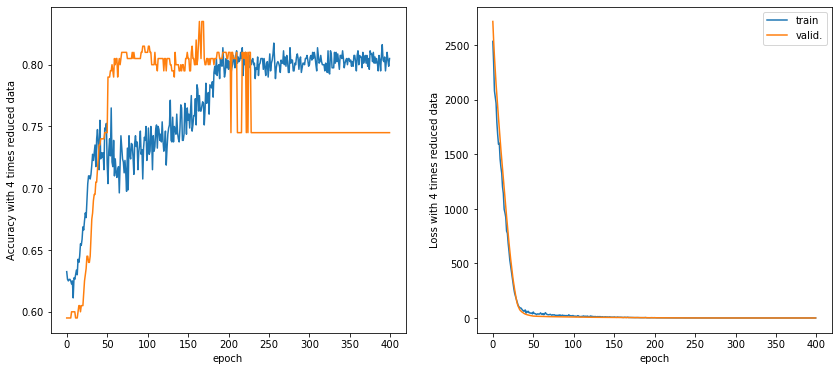

In [ ]:
fig_rx4,AX_rx4=plt.subplots(1,2,figsize=(14,6.))
ax=AX_rx4[0]
ax.plot(history_rx4.history['accuracy'],label="train")
ax.plot(history_rx4.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy with 4 times reduced data")
ax=AX_rx4[1]
ax.plot(history_rx4.history['loss'],label="train")
ax.plot(history_rx4.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss with 4 times reduced data")
ax.legend()

2
[24.89066375 15.35698709] 0.0
[3.18350011e+01 2.22752834e-02] 1.0
[ -1.03732963 -12.26550462] 1.0
[47.32299816 13.40543771] 0.0
[-16.39448381  32.63804268] 1.0
[ 21.11159551 -24.7583143 ] 1.0
[ -3.53371371 -47.0240683 ] 0.0
[-13.55097133 -34.39614108] 1.0
[-32.26961866  36.7889671 ] 0.0
[-4.60051241 -8.88218678] 1.0
data: 400
train: 320


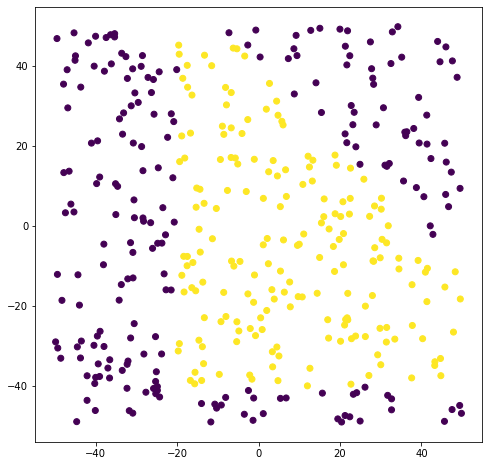

Train: 320 	 Validation: 80


In [ ]:
# reduced data x10 

x_rx10 = np.loadtxt('reducedx10_data-for-DNN-1.dat')
y_rx10 = np.loadtxt('reducedx10_labels-for-DNN-1.dat')

# dim of samaple
L_rx10 = len(x_rx10[0])
print(L_rx10)
N_rx10 = len(x_rx10)
for i in range(10):
    print(x_rx10[i], y_rx10[i])

N_train_rx10 = int(perc_train * N_rx10)
print(f'data: {N_rx10}\ntrain: {N_train_rx10}')

plt.figure(figsize = (8,8))
plt.scatter(x_rx10[:,0],x_rx10[:,1],c=y_rx10)
plt.show()

(x_train_rx10, y_train_rx10) = (x_rx10[0:N_train_rx10], y_rx10[0:N_train_rx10])
(x_valid_rx10, y_valid_rx10) = (x_rx10[N_train_rx10:], y_rx10[N_train_rx10:])
print("Train:", len(x_train_rx10), "\t Validation:", len(x_valid_rx10))

x_train_rx10 = Rescale(x_train_rx10)
x_valid_rx10 = Rescale(x_valid_rx10)

history_rx10 = model.fit(x_train_rx10, y_train_rx10, epochs=400, batch_size=50, validation_data=(x_valid_rx10, y_valid_rx10))



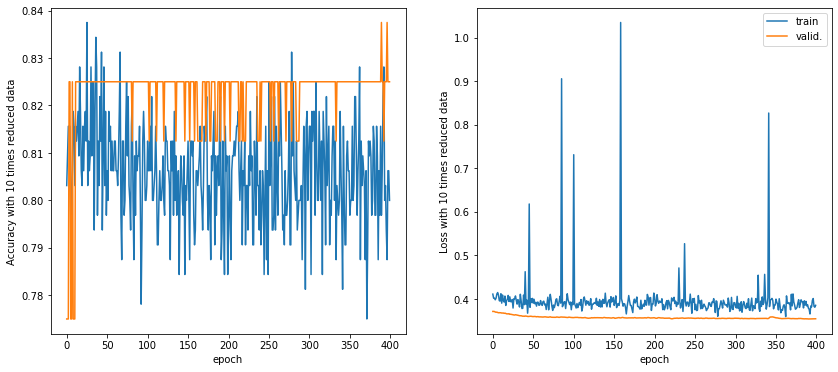

In [ ]:
fig_rx10,AX_rx10=plt.subplots(1,2,figsize=(14,6.))
ax=AX_rx10[0]
ax.plot(history_rx10.history['accuracy'],label="train")
ax.plot(history_rx10.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy with 10 times reduced data")
ax=AX_rx10[1]
ax.plot(history_rx10.history['loss'],label="train")
ax.plot(history_rx10.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss with 10 times reduced data")
ax.legend()


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 8000
train: 6400


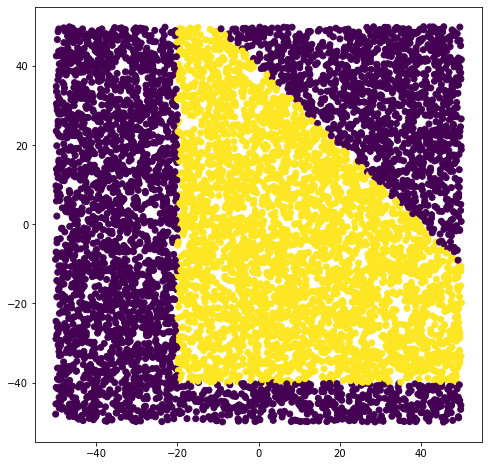

Train: 6400 	 Validation: 1600


In [ ]:
# increased data x2

x_ix2 = np.loadtxt('increasedx2_data-for-DNN-1.dat')
y_ix2 = np.loadtxt('increasedx2_labels-for-DNN-1.dat')

# dim of samaple
L_ix2 = len(x_ix2[0])
print(L_ix2)
N_ix2= len(x_ix2)
for i in range(10):
    print(x_ix2[i], y_ix2[i])

N_train_ix2 = int(perc_train * N_ix2)
print(f'data: {N_ix2}\ntrain: {N_train_ix2}')

plt.figure(figsize = (8,8))
plt.scatter(x_ix2[:,0],x_ix2[:,1],c=y_ix2)
plt.show()

(x_train_ix2, y_train_ix2) = (x_ix2[0:N_train_ix2], y_ix2[0:N_train_ix2])
(x_valid_ix2, y_valid_ix2) = (x_ix2[N_train_ix2:], y_ix2[N_train_ix2:])
print("Train:", len(x_train_ix2), "\t Validation:", len(x_valid_ix2))

x_train_ix2 = Rescale(x_train_ix2)
x_valid_ix2 = Rescale(x_valid_ix2)

history_ix2 = model.fit(x_train_ix2, y_train_ix2, epochs=400, batch_size=50, validation_data=(x_valid_ix2, y_valid_ix2))



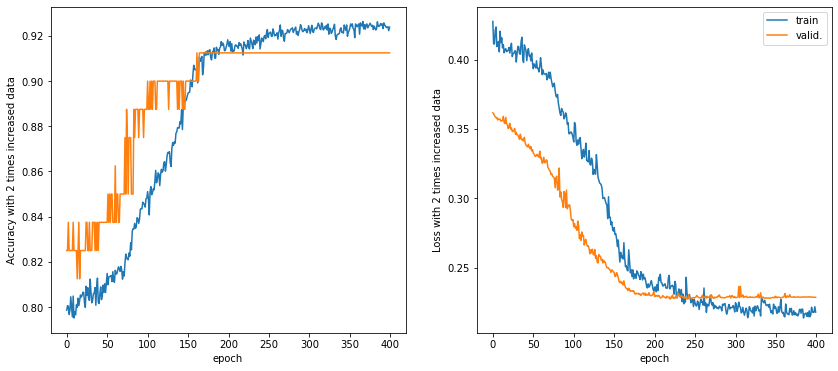

In [ ]:
fig_ix2,AX_ix2=plt.subplots(1,2,figsize=(14,6.))
ax=AX_ix2[0]
ax.plot(history_ix2.history['accuracy'],label="train")
ax.plot(history_ix2.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy with 2 times increased data")
ax=AX_ix2[1]
ax.plot(history_ix2.history['loss'],label="train")
ax.plot(history_ix2.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss with 2 times increased data")
ax.legend()


In [ ]:
# increased data x4

x_ix4 = np.loadtxt('increasedx4_data-for-DNN-1.dat')
y_ix4 = np.loadtxt('increasedx4_labels-for-DNN-1.dat')

# dim of samaple
L_ix4 = len(x_ix4[0])
print(L_ix4)
N_ix4= len(x_ix4)
for i in range(10):
    print(x_ix4[i], y_ix4[i])

N_train_ix4 = int(perc_train * N_ix4)
print(f'data: {N_ix4}\ntrain: {N_train_ix4}')

plt.figure(figsize = (8,8))
plt.scatter(x_ix4[:,0],x_ix4[:,1],c=y_ix4)
plt.show()

(x_train_ix4, y_train_ix4) = (x_ix4[0:N_train_ix4], y_ix4[0:N_train_ix4])
(x_valid_ix4, y_valid_ix4) = (x_ix4[N_train_ix4:], y_ix4[N_train_ix4:])
print("Train:", len(x_train_ix4), "\t Validation:", len(x_valid_ix4))

x_train_ix4 = Rescale(x_train_ix4)
x_valid_ix4 = Rescale(x_valid_ix4)

history_ix4 = model.fit(x_train_ix4, y_train_ix4, epochs=400, batch_size=50, validation_data=(x_valid_ix4, y_valid_ix4))



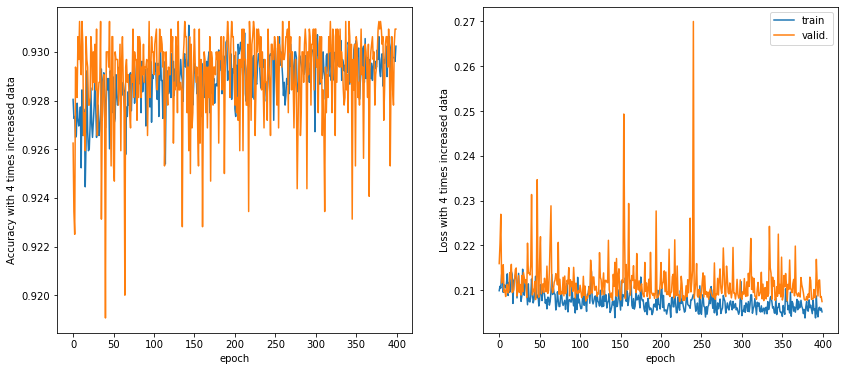

In [ ]:
fig_ix4,AX_ix4=plt.subplots(1,2,figsize=(14,6.))
ax=AX_ix4[0]
ax.plot(history_ix4.history['accuracy'],label="train")
ax.plot(history_ix4.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy with 4 times increased data")
ax=AX_ix4[1]
ax.plot(history_ix4.history['loss'],label="train")
ax.plot(history_ix4.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss with 4 times increased data")
ax.legend()


In [ ]:
# augmented data 


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,epochs=1, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# reduced data x10 

x_train_shift = Rescale(x_train_shift)

history_aug = model.fit(x_train_shift, y_train_shift, epochs=400, batch_size=50, validation_data=(x_valid, y_valid))


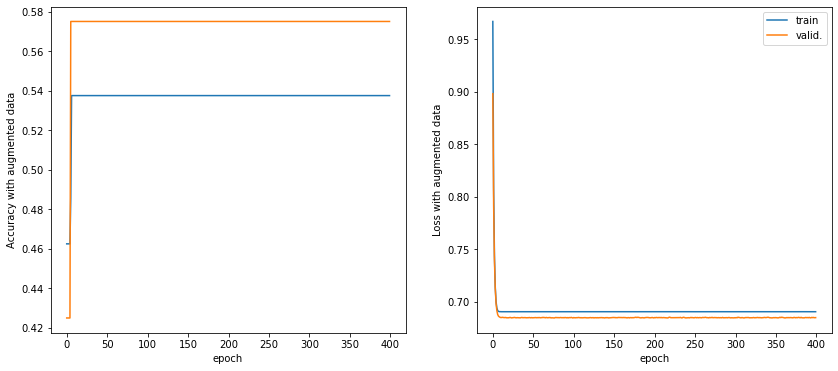

In [ ]:
fig_aug,AX_aug=plt.subplots(1,2,figsize=(14,6.))
ax=AX_aug[0]
ax.plot(history_aug.history['accuracy'],label="train")
ax.plot(history_aug.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy with augmented data")
ax=AX_aug[1]
ax.plot(history_aug.history['loss'],label="train")
ax.plot(history_aug.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss with augmented data")
ax.legend()


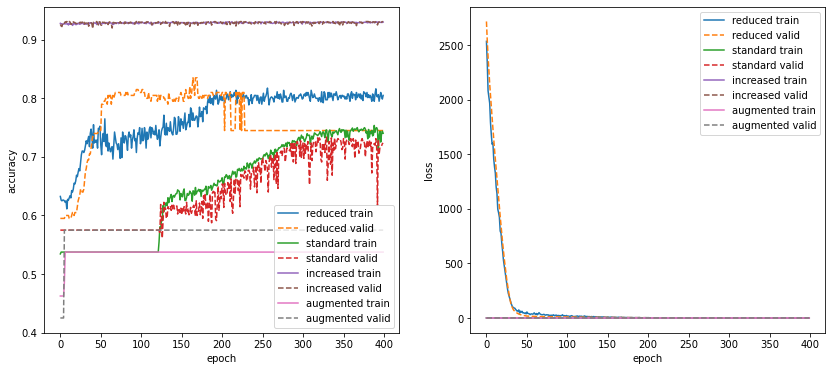

In [ ]:
#plot for the accuracies
#put the model you want to fit in .history
fig, AX = plt.subplots (1, 2, figsize = (14, 6.))
ax = AX[0]
ax.plot(history_rx4.history['accuracy'], label = 'reduced train')
ax.plot(history_rx4.history['val_accuracy'], label = 'reduced valid', linestyle="--")
ax.plot(history.history['accuracy'], label = 'standard train')
ax.plot(history.history['val_accuracy'], label = 'standard valid' ,linestyle="--")
ax.plot(history_ix4.history['accuracy'], label = 'increased train')
ax.plot(history_ix4.history['val_accuracy'],   label = 'increased valid', linestyle="--")
ax.plot(history_aug.history['accuracy'],     label = 'augmented train')
ax.plot(history_aug.history['val_accuracy'], label = 'augmented valid', linestyle="--")
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.legend()
#plot for the losses
ax = AX[1]
ax.plot(history_rx4.history['loss'], label = 'reduced train')
ax.plot(history_rx4.history['val_loss'], label = 'reduced valid', linestyle="--")
ax.plot(history.history['loss'], label = 'standard train')
ax.plot(history.history['val_loss'], label = 'standard valid', linestyle="--")
ax.plot(history_ix4.history['loss'], label = 'increased train')
ax.plot(history_ix4.history['val_loss'], label = 'increased valid', linestyle="--")
ax.plot(history_aug.history['loss'], label = 'augmented train')
ax.plot(history_aug.history['val_loss'], label = 'augmented valid', linestyle="--")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()

